In [1]:
from __future__ import print_function, division

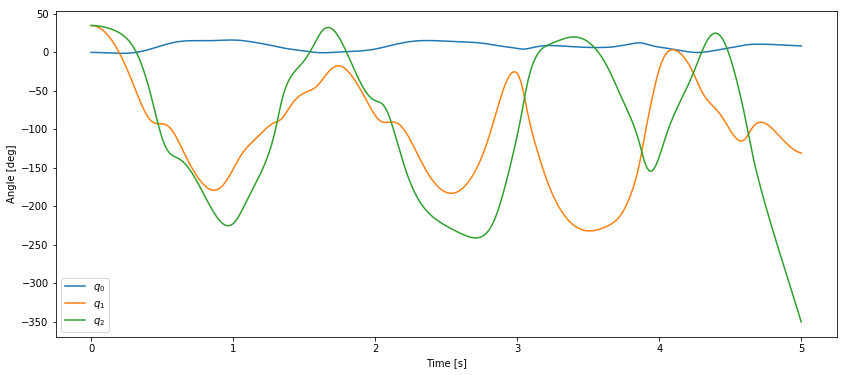

In [2]:
from solution.simulation import *

In [3]:
from numpy import zeros, cos, sin, arange, around
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle

In [4]:
def animate_pendulum(t, states, length, filename=None):
    """Animates the n-pendulum and optionally saves it to file.

    Parameters
    ----------
    t : ndarray, shape(m)
        Time array.
    states: ndarray, shape(m,p)
        State time history.
    length: float
        The length of the pendulum links.
    filename: string or None, optional
        If true a movie file will be saved of the animation. This may take some time.

    Returns
    -------
    fig : matplotlib.Figure
        The figure.
    anim : matplotlib.FuncAnimation
        The animation.

    """
    # the number of pendulum bobs
    numpoints = states.shape[1] / 2

    # first set up the figure, the axis, and the plot elements we want to animate
    fig = plt.figure()
    
    # some dimesions
    cart_width = 0.4
    cart_height = 0.2
    
    # set the limits based on the motion
    xmin = around(states[:, 0].min() - cart_width / 2.0, 1)
    xmax = around(states[:, 0].max() + cart_width / 2.0, 1)
    
    # create the axes
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1.1, 1.1), aspect='equal')
    
    # display the current time
    time_text = ax.text(0.04, 0.9, '', transform=ax.transAxes)
    
    # create a rectangular cart
    rect = Rectangle([states[0, 0] - cart_width / 2.0, -cart_height / 2],
        cart_width, cart_height, fill=True, color='red', ec='black')
    ax.add_patch(rect)
    
    # blank line for the pendulum
    line, = ax.plot([], [], lw=2, marker='o', markersize=6)

    # initialization function: plot the background of each frame
    def init():
        time_text.set_text('')
        rect.set_xy((0.0, 0.0))
        line.set_data([], [])
        return time_text, rect, line,

    # animation function: update the objects
    def animate(i):
        time_text.set_text('time = {:2.2f}'.format(t[i]))
        rect.set_xy((states[i, 0] - cart_width / 2.0, -cart_height / 2))
        x = hstack((states[i, 0], zeros((numpoints - 1))))
        y = zeros((numpoints))
        for j in arange(1, numpoints):
            x[j] = x[j - 1] + length * cos(states[i, j])
            y[j] = y[j - 1] + length * sin(states[i, j])
        line.set_data(x, y)
        return time_text, rect, line,

    # call the animator function
    anim = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init,
            interval=t[-1] / len(t) * 1000, blit=True, repeat=False)
  
    # save theanim.save animation if a filename is given
    if filename is not None:
        (filename, fps=15, codec='libx264')

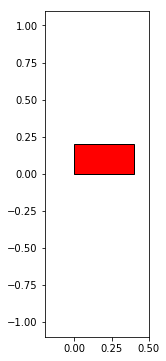

In [15]:
arm_length=0.485
animate_pendulum(t, y, arm_length, filename=None)


In [16]:
from IPython.display import HTML
h = \
"""
<video width="640" height="480" controls>
  <source src="files/open-loop.ogv" type="video/ogg">
  <source src="files/open-loop.mp4" type="video/mp4">
Your browser does not support the video tag, check out the YouTuve version instead: http://youtu.be/Nj3_npq7MZI.
</video>
"""
HTML(h)